In [1]:
# Importing the necessary libraries
import numpy as np  
import pandas as pd 
import os  

# 1. Load and Explore the Data

In [19]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
df.head()

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# 2. Data Cleaning and Preprocessing
# ----------------------------------
 The goal of this section is to clean the reviews by:
 - Removing HTML tags
 - Converting text to lowercase
 - Removing special characters
 - Removing stop words
 - Applying stemming


In [20]:
import re  # For regular expressions
from nltk.corpus import stopwords  # To remove common stop words
from nltk.stem.porter import PorterStemmer

In [21]:
def clean_html(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [22]:
def convert_lower(text):
    return text.lower()

In [23]:
def remove_special(text):
    return re.sub(r'[^a-zA-Z0-9]', ' ', text)

In [24]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    return [word for word in text.split() if word not in stop_words]

In [25]:
# Function to apply stemming
ps = PorterStemmer()
def stem_words(text):
    return [ps.stem(word) for word in text]

In [26]:
# Function to join the words back into a sentence
def join_back(words):
    return ' '.join(words)

In [27]:
# Applying the cleaning functions on the dataset
df['review'] = df['review'].apply(clean_html)  # Remove HTML
df['review'] = df['review'].apply(convert_lower)  # Convert to lowercase
df['review'] = df['review'].apply(remove_special)  # Remove special characters
df['review'] = df['review'].apply(remove_stopwords)  # Remove stop words
df['review'] = df['review'].apply(stem_words)  # Apply stemming
df['review'] = df['review'].apply(join_back)  # Join words back into a single string

# 3. Sentiment Encoding

In [28]:
df['sentiment'].replace({'positive': 1, 'negative': 0}, inplace=True)

/tmp/ipykernel_30/3188136084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sentiment'].replace({'positive': 1, 'negative': 0}, inplace=True)
/tmp/ipykernel_30/3188136084.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sentiment'].replace({'positive': 1, 'negative': 0}, inplace=True

# 4. Feature Extraction: Converting Text to Numerical Representation
We will now use `CountVectorizer` to convert the text into a matrix of token counts.
This will be used as input for the classification models.

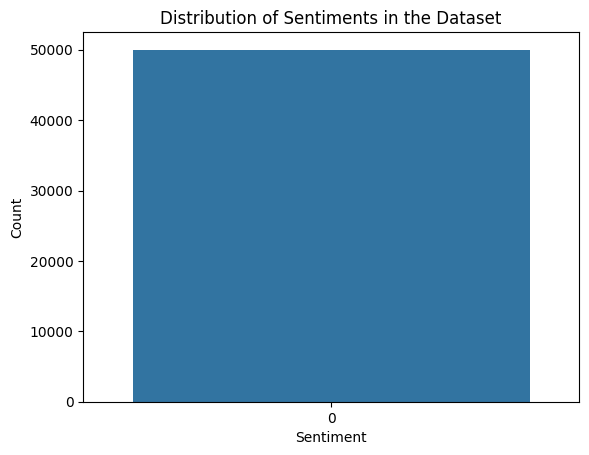

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.countplot(df['sentiment'])
plt.title('Distribution of Sentiments in the Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000) ## Vectorizing the text with a maximum of 5000 features (most common words)
X = cv.fit_transform(df['review']).toarray()

In [14]:
y = df['sentiment'].values

# 5. Splitting the Data into Training and Testing Sets

In [31]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Training three Naive Bayes models with cross-validation
models = {
    "GaussianNB": GaussianNB(),
    "MultinomialNB": MultinomialNB(),
    "BernoulliNB": BernoulliNB()
}


GaussianNB Cross-Validation Accuracy: 0.7168599999999999


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


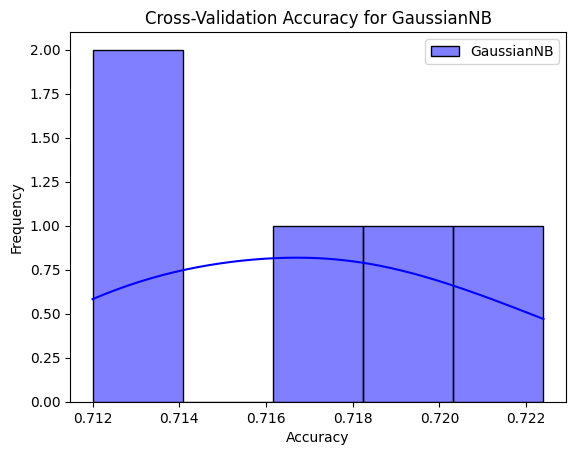

MultinomialNB Cross-Validation Accuracy: 0.8441400000000001


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


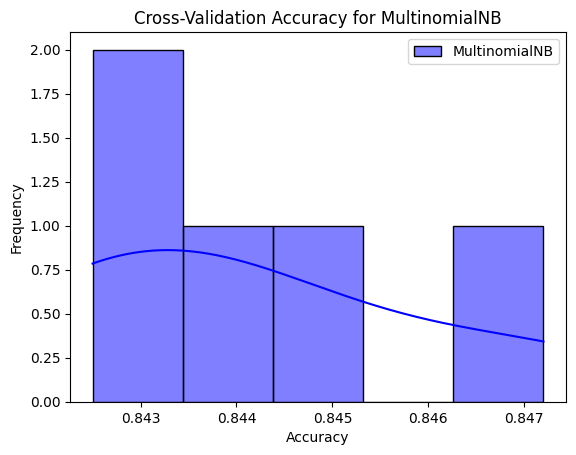

BernoulliNB Cross-Validation Accuracy: 0.8470400000000001


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


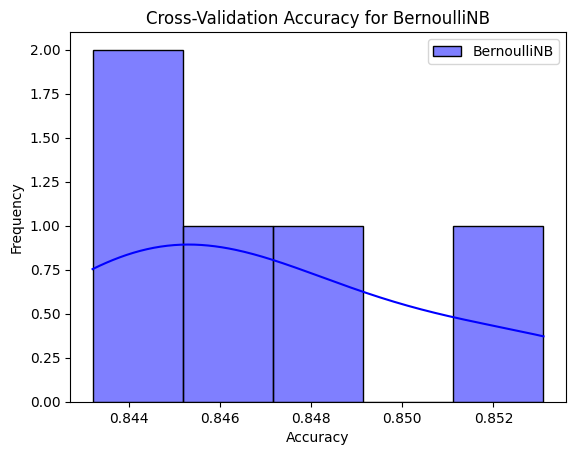

In [32]:
for model_name, model in models.items():
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    print(f'{model_name} Cross-Validation Accuracy: {cv_results.mean()}')

    # Visualizing the cross-validation accuracy
    sns.histplot(cv_results, kde=True, bins=5, label=f"{model_name}", color="blue")
    plt.title(f'Cross-Validation Accuracy for {model_name}')
    plt.xlabel('Accuracy')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Model Training
 We will train three different types of Naive Bayes classifiers:
 
 - Gaussian Naive Bayes performs well for normally distributed data.
 - Multinomial Naive Bayes works well for discrete counts (good for text data).
 - Bernoulli Naive Bayes is suited for binary features.

GaussianNB Test Accuracy: 0.714


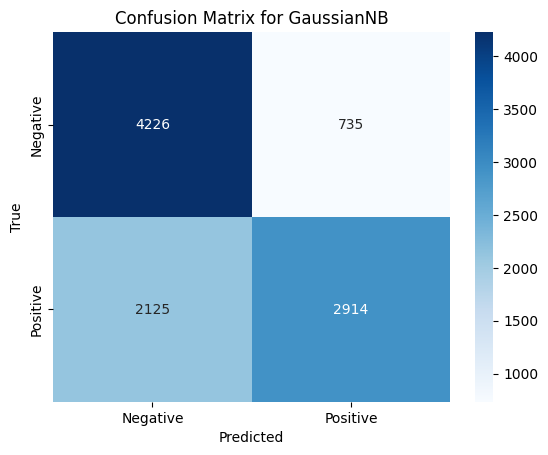

MultinomialNB Test Accuracy: 0.8472


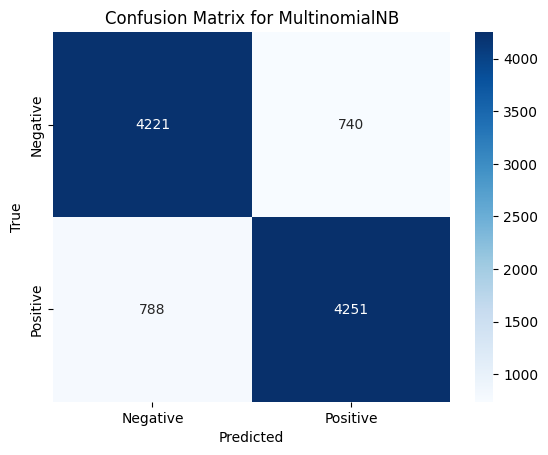

BernoulliNB Test Accuracy: 0.8459


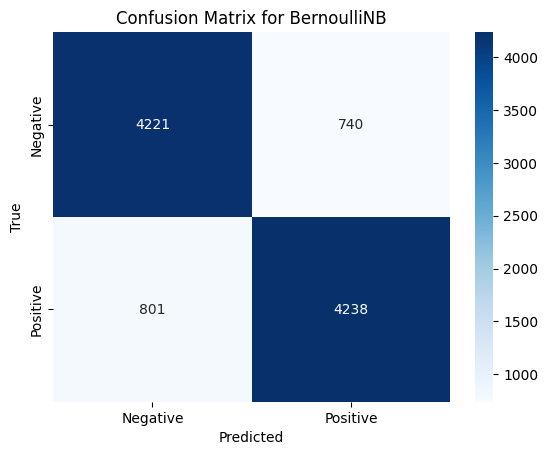

In [34]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Test Accuracy: {accuracy}')
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plotting the Confusion Matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# 7. Visualizing Word Frequencies

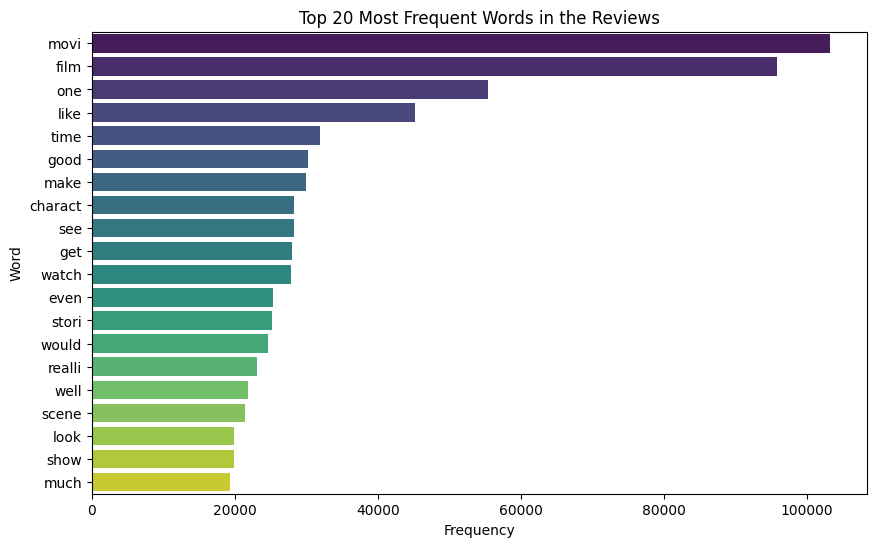

In [35]:
word_freq = np.sum(X, axis=0)
word_freq_df = pd.DataFrame({'word': cv.get_feature_names_out(), 'frequency': word_freq})
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False).head(20)

# Plotting the most common words
plt.figure(figsize=(10,6))
sns.barplot(x='frequency', y='word', data=word_freq_df, palette='viridis')
plt.title('Top 20 Most Frequent Words in the Reviews')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()